# ***Ejercicio 1***

1. Genere un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016.
2. Trace un gráfico que represente la distribución de la edad de los ganadores de medallas en los cinco principales deportes en 2016.
3. Descubra qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en 2016.
4. Observe la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016.

- **Pasos principales**
   1. Descargue el conjunto de datos y formatéelo como un DataFrame de pandas.
   2. Filtra el **DataFrame** para incluir solo las filas correspondientes a los ganadores de medallas de 2016.
   3. Descubre las medallas concedidas en 2016 en cada deporte.
   4. Enumera los cinco deportes más importantes en función del mayor número de medallas concedidas. Filtra el **DataFrame** una vez más para incluir solo los registros de los cinco deportes principales en 2016.
   5. Genere un gráfico de barras con los recuentos de registros correspondientes a cada uno de los cinco deportes principales.
   6. Generar un histograma para la característica **Edad** de todos los ganadores de medallas en los cinco deportes principales (2016).
   7. Genera un gráfico de barras que indique cuántas medallas ganó el equipo de cada país en los cinco deportes principales en 2016.
   8. Genera un gráfico de barras que indique el peso medio de los jugadores, clasificados en función del género, que ganaron en los cinco principales deportes en 2016.


## Lectura de datos



In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
olympics_url = "C:/Users/acarb/Documents/vis/events.csv"
md2016 = pd.read_csv(olympics_url, usecols=['Sex', 'Age', 'Weight','Team','Year','Sport','Medal']).loc[olympics['Year']==2016]

## Inciso A
Genere un gráfico que indique el número de medallas concedidas en cada uno de los cinco principales deportes en 2016.

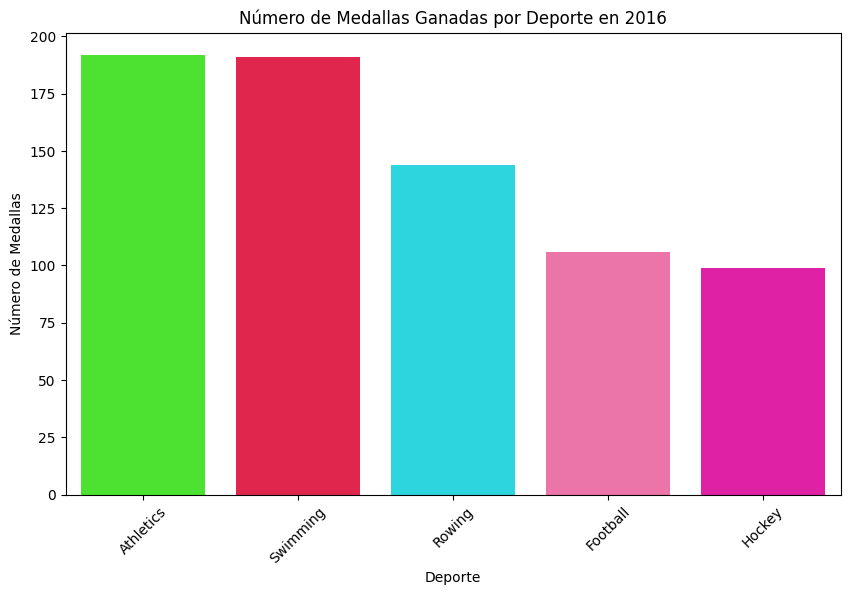

In [79]:
md2016 =  (md2016[md2016['Medal'].notna()])['Sport'].value_counts().head(5)
plt.figure(figsize=(10, 6))
colores_neon = ['#39FF14', '#FF073A', '#0FF0FC', '#FF61A6', '#FE01B1']
sns.barplot(x=md2016.index, y=md2016.values, palette=colores_neon)
plt.title('Número de Medallas Ganadas por Deporte en 2016')
plt.xlabel('Deporte')
plt.ylabel('Número de Medallas')
plt.xticks(rotation=45)
plt.show()

## Inciso B
Trace un gráfico que represente la distribución de la edad de los ganadores de medallas en los cinco principales deportes en 2016.

- **Diversidad en Competencia:** El atletismo y la natación son los deportes más diversos en términos de oportunidades para los atletas de ganar medallas. Este alto número de medallas refleja tanto el número de eventos como la participación global en estos deportes.

- **Especialización:** Los deportes de equipo como el fútbol y el hockey, a pesar de su popularidad, ofrecen menos oportunidades para ganar medallas, ya que cada equipo ganador recibe una única medalla.

- **Estrategia de Competencia:** Los comités olímpicos nacionales pueden enfocarse en estos deportes de alta medallería, como atletismo y natación, para maximizar sus oportunidades de éxito en los Juegos Olímpicos.


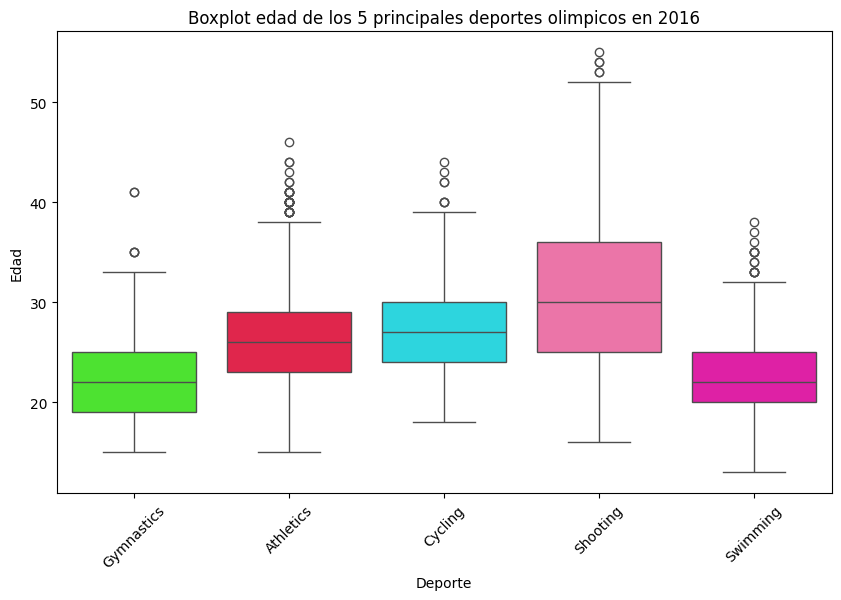

In [80]:
sports = olympics2016['Sport'].value_counts().head(5).index
top5 = olympics2016[olympics2016['Sport'].isin(sports)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Sport', y='Age', data=top5, palette=colores_neon)
plt.title('Boxplot edad de los 5 principales deportes olimpicos en 2016')
plt.xlabel('Deporte')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

- **Deportes de Resistencia vs. Precisión:** Los deportes que requieren más resistencia física, como la gimnasia y la natación, tienen medallistas más jóvenes. En contraste, deportes como el tiro, que requieren precisión y posiblemente experiencia, muestran una tendencia a tener medallistas de mayor edad.

- **Variedad en Atletismo y Ciclismo:** La amplia gama de edades en estos deportes podría deberse a la diversidad de eventos dentro de cada disciplina, que pueden requerir diferentes niveles de resistencia, velocidad y experiencia.


## Inciso C
Descubre qué equipos nacionales ganaron el mayor número de medallas en los cinco principales deportes en 2016.

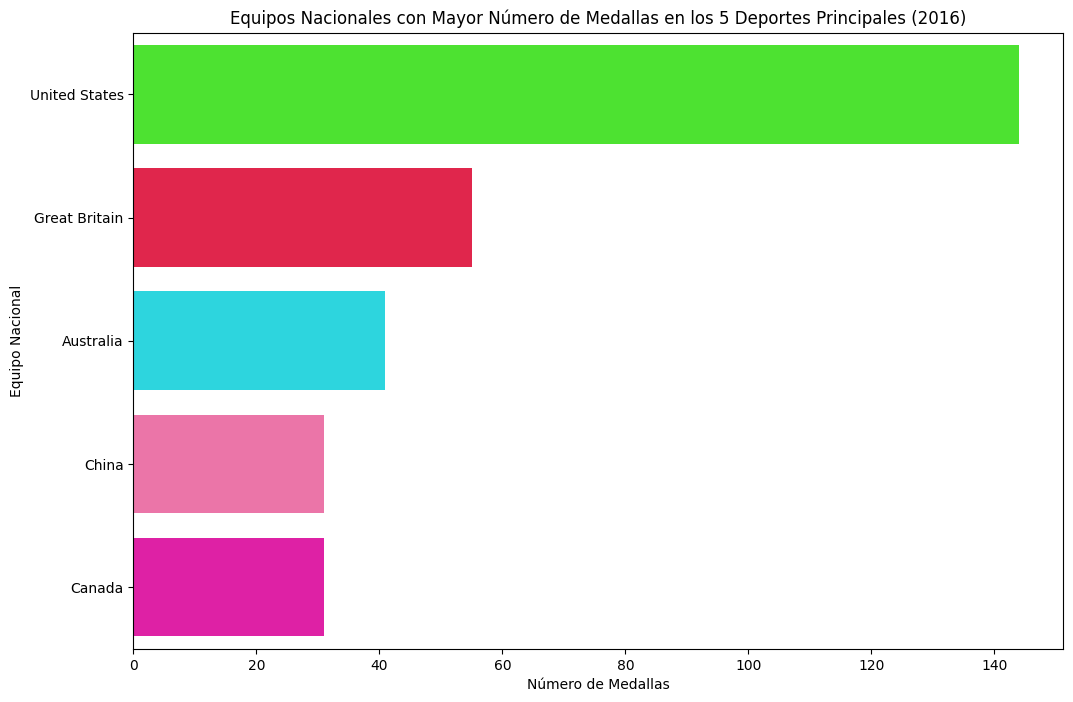

In [81]:
cn = top5.groupby('Team')['Medal'].count().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=cn.values, y=cn.index, palette=colores_neon)
plt.title('Equipos Nacionales con Mayor Número de Medallas en los 5 Deportes Principales (2016)')
plt.xlabel('Número de Medallas')
plt.ylabel('Equipo Nacional')
plt.show()


- **Supremacía de Estados Unidos:** La destacada posición de Estados Unidos refleja su capacidad para dominar en múltiples deportes, posiblemente debido a su extensa infraestructura deportiva y programas de desarrollo de atletas.

- **Especialización Regional:** Países como Jamaica y Australia probablemente invierten en deportes específicos, lo que les permite destacarse en áreas donde tienen una ventaja competitiva natural o histórica.

- **Competencia Global:** Aunque hay una concentración de medallas en los países de habla inglesa, la presencia de países como China y Rusia muestra la naturaleza competitiva y global de los Juegos Olímpicos.


## Inciso D
Observe la tendencia del peso medio de los atletas masculinos y femeninos ganadores en los cinco principales deportes en 2016

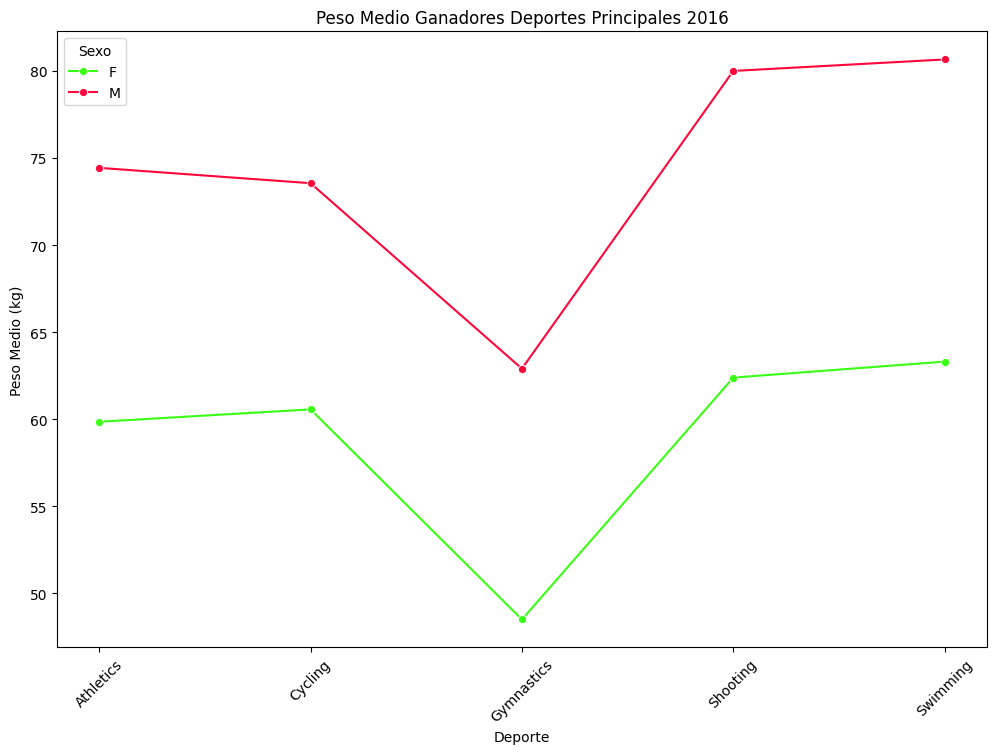

In [82]:
average_weight = top5.groupby(['Sport', 'Sex'])['Weight'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Sport', y='Weight', hue='Sex', data=average_weight, marker='o', palette=colores_neon)
plt.title('Peso Medio Ganadores Deportes Principales 2016')
plt.xlabel('Deporte')
plt.ylabel('Peso Medio (kg)')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()

- **Importancia del Peso en el Rendimiento:** El peso medio de los atletas varía significativamente según el deporte, lo que refleja las diferentes demandas físicas de cada disciplina. Deportes que requieren fuerza y potencia tienden a tener atletas más pesados, mientras que deportes que requieren agilidad y resistencia tienden a favorecer a atletas más ligeros.
